In [2]:

import numpy as np
import scipy as scp
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy.linalg as npl 
    
from math import *
from sklearn import linear_model
from sklearn.linear_model import LinearRegression



In [3]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3

In [4]:
reg = LinearRegression().fit(X, y)

In [5]:
reg.score(X, y)

1.0

In [6]:
reg.coef_

array([1., 2.])

In [7]:
reg.intercept_

3.000000000000001

In [8]:
reg.predict(np.array([[3, 5]]))

array([16.])

In [9]:
a=[[0, 0], [0, 0], [1, 1]]
b=[0, .1, 1]

In [10]:
reg = linear_model.Ridge(alpha=.5).fit(a,b)

In [11]:
reg.coef_

array([0.34545455, 0.34545455])

In [12]:
 reg.intercept_

0.1363636363636364

In [13]:
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13)).fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

In [14]:
reg.alpha_

0.01

In [15]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.3574, 0.9428, 0.1054],
        [0.9237, 0.0411, 0.9593],
        [0.5596, 0.2197, 0.4332],
        [0.8226, 0.2991, 0.5248],
        [0.3401, 0.8669, 0.7962]])


In [16]:

import spacepy.time as spt
import spacepy.omni as om
import spacepy.toolbox as tb
#tb.update(omni=True)



Qin-Denton/OMNI2 data not found in current format. This module has limited functionality.
Run spacepy.toolbox.update(QDomni=True) to download data


In [17]:
ticks = spt.Ticktock(['2002-02-02T12:00:00', '2002-02-02T18:00:00'], 'ISO')
ticks = spt.tickrange('2002-01-01T00:00:00', '2003-12-01T00:00:00', deltadays = 1./24.)


In [18]:
d = om.get_omni(ticks)
d.tree(levels=1)


+
|____ByIMF
|____Bz1
|____Bz2
|____Bz3
|____Bz4
|____Bz5
|____Bz6
|____BzIMF
|____DOY
|____Dst
|____G
|____Hr
|____Kp
|____Pdyn
|____Qbits
|____RDT
|____UTC
|____W
|____Year
|____akp3
|____dens
|____ticks


In [19]:
import matplotlib.pyplot as plt

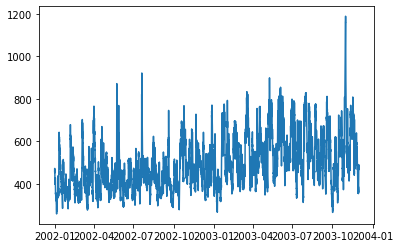

In [20]:
plt.plot(ticks.UTC, d['velo'])

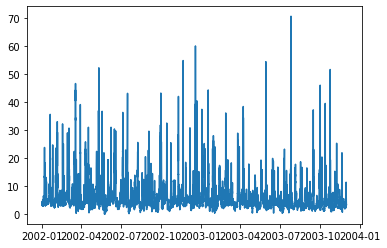

In [21]:
plt.plot(ticks.UTC, d['dens'])

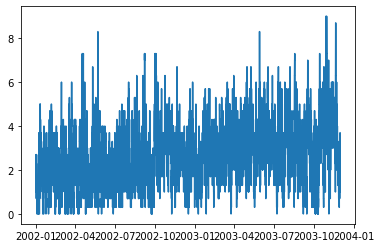

In [22]:
plt.plot(ticks.UTC, d['Kp'])

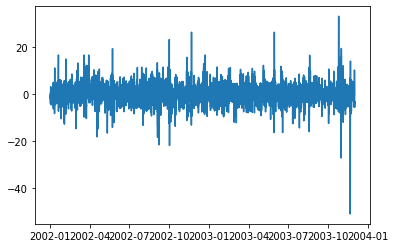

In [23]:
plt.plot(ticks.UTC, d['BzIMF'])

predire Kp a partir le vente de soleil
Bz, Velo, dens => Kp
Modele pour etudier
decoupe sur 3 partie : Training , Test, valide


In [24]:
np.shape(d['Kp'])

(16777,)

In [25]:
np.shape(d['BzIMF'])

(16777,)

In [26]:
k=np.array([19])
print(k)

[19]


In [27]:
n=np.size(d['Kp'])
X= np.zeros((n,2))
Y= np.zeros((n,2))
X[:,1]=d['Kp']
X[:,0]=np.arange(n)
Y[:,1]=d['dens']
Y[:,0]=np.arange(n)
#d['Kp']
#d['BzIMF']

In [28]:
reg = LinearRegression().fit(Y,d['Kp'])

In [29]:
reg.coef_

array([0.00010332, 0.03949642])

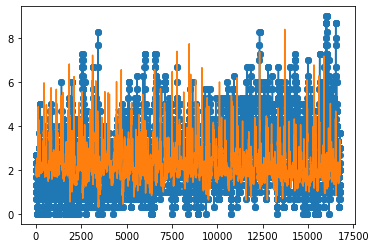

In [30]:
plt.plot(d['Kp'],'-o')
plt.plot(d['dens']**0.5)

C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


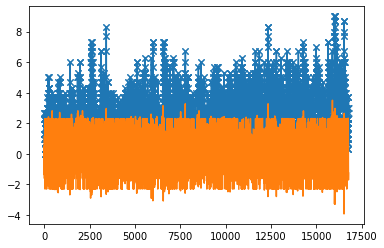

In [31]:
plt.plot(d['Kp'],'-x')
#plt.plot(d['BzIMF']**(1/7))
plt.plot(np.sign(d['BzIMF'])*np.log(abs(d['BzIMF'])))

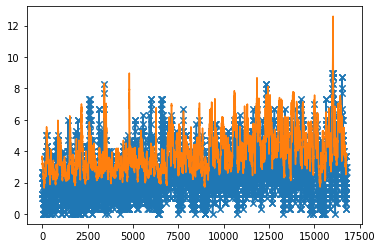

In [32]:
plt.plot(d['Kp'],'-x')
plt.plot(d['velo']**(4/3)*0.001)

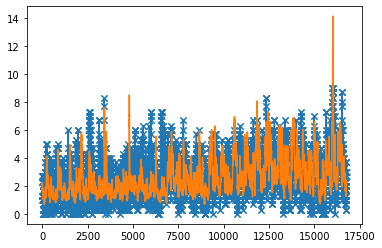

In [33]:
plt.plot(d['Kp'],'-x')
plt.plot(d['velo']**(2)*0.00001)

In [34]:
np.sign(d['BzIMF'])

dmarray([-1., -1., -1., ..., -1., -1., -1.])

In [35]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures

In [36]:
n=np.size(d['Kp'])
X= np.zeros((n,2))
Y= np.zeros((n,2))
Z= np.zeros((n,2))
X[:,0]=d['velo']**(4/3)
X[:,1]=(np.sign(d['BzIMF'])*((abs(d['BzIMF'])**(1/7))))

Y[:,0]=d['dens']**1/2
Y[:,1]=d['velo']**2
#Z[:,0]=X[:,0]*X[:,1]
Z[:,0]=X[:,0]*(np.sign(d['BzIMF'])*(np.log(abs(d['BzIMF']+0.000001))))
Z[:,1]=Y[:,0]*Y[:,1]
y = d['Kp']

In [37]:
d['velo']**(4/3)

dmarray([3540.65475034, 3581.85489431, 3685.37360436, ..., 3726.98666372,
         3779.16671572, 3726.98666372])

In [38]:
d['dens']**1/2

dmarray([1.60000002, 1.75      , 2.04999995, ..., 1.79999995, 1.60000002,
         1.64999998])

In [39]:
reg = LinearRegression().fit(Z, y)

In [40]:
reg.coef_

array([-9.18033804e-05,  1.20366443e-06])

In [41]:
reg.score(Z,y)

0.28633608037303915

In [42]:
reg.intercept_

1.8796506210181976

C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arctan
  This is separate from the ipykernel package so we can avoid doing imports until


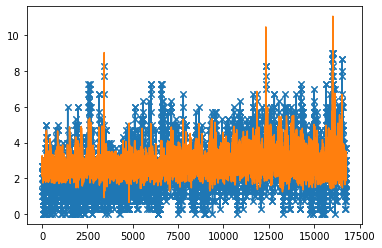

In [43]:
plt.plot(d['Kp'],'-x')
Bt = np.sqrt((d['ByIMF']**2) + (d['BzIMF']**2))
theta = np.arctan(-d['ByIMF']/d['BzIMF'])
K3=-1.08699883e-04*((d['velo']**(4/3))*(np.sign(d['BzIMF'])*(np.log(abs(d['BzIMF']+0.000001)))))
K4=1.59121140e-06*(d['velo']**2)*(d['dens']**(1/2))
plt.plot(1.9947161904490889+K3+K4)

In [44]:
print(npl.norm((d['Kp']-(1.9947161904490889+K3+K4)),2)/(n**0.5))
print(npl.norm((d['Kp']-(1.9947161904490889+K3+K4))/(n**0.5),2))

1.1597686793527529
1.159768679352753


C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in arctan
  """


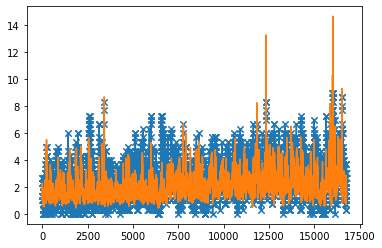

In [45]:
plt.plot(d['Kp'],'-x')
#formule=0.05+2.244*1e-4*d['velo']**(4/3)+2.844*1e-6*d['velo']*d['dens']**(1/2)
#plt.plot(formule)
Bt = np.sqrt(d['ByIMF']**2 + d['BzIMF']**2)
theta = np.arctan(-d['ByIMF']/d['BzIMF'])
K1=2.244*10**(-4)*(d['velo']**(4/3)*((Bt**(2/3)))*(((np.sin(theta/2))**8)**(1/3)))
K2=2.844*10**(-6)*(d['velo']**2)*(d['dens']**(1/2))
plt.plot(0.05+K1+K2)

In [46]:
print(npl.norm((d['Kp']-(0.05+K3+K4)),2)/(n**0.5))

2.085718823448551


(array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
         2.000e+00, 3.000e+00, 4.000e+00, 6.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 1.900e+01, 4.400e+01,
         4.500e+01, 4.900e+01, 1.700e+01, 7.000e+00],
        [2.330e+02, 1.085e+03, 1.106e+03, 1.992e+03, 1.598e+03, 7.960e+02,
         2.220e+02, 5.900e+01, 1.600e+01, 1.200e+01],
        [1.423e+03, 2.382e+03, 1.667e+03, 2.190e+03, 9.740e+02, 3.640e+02,
         4.600e+01, 1.600e+01, 1.000e+01, 2.000e+00],
        [4.500e+01, 8.900e+01, 7.000e+01, 6.600e+01, 3.600e+01, 1.300e+01,
         3.000e+00, 1.

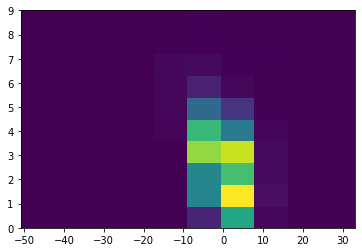

In [47]:
plt.hist2d(d['BzIMF'],d['Kp'])

(array([[5.130e+02, 6.680e+02, 2.090e+02, 1.180e+02, 3.700e+01, 1.600e+01,
         3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [8.890e+02, 1.769e+03, 1.074e+03, 1.062e+03, 4.240e+02, 1.390e+02,
         4.300e+01, 3.100e+01, 1.000e+01, 0.000e+00],
        [2.540e+02, 8.140e+02, 8.750e+02, 1.450e+03, 7.600e+02, 2.660e+02,
         9.700e+01, 4.500e+01, 1.100e+01, 0.000e+00],
        [2.900e+01, 2.410e+02, 4.890e+02, 9.860e+02, 6.680e+02, 2.790e+02,
         6.600e+01, 2.200e+01, 1.100e+01, 6.000e+00],
        [5.000e+00, 5.900e+01, 1.610e+02, 4.800e+02, 4.430e+02, 2.760e+02,
         6.700e+01, 2.700e+01, 1.000e+01, 2.000e+00],
        [9.000e+00, 6.000e+00, 3.600e+01, 1.500e+02, 2.860e+02, 2.210e+02,
         4.200e+01, 7.000e+00, 7.000e+00, 8.000e+00],
        [2.000e+00, 1.000e+00, 3.000e+00, 6.000e+00, 1.500e+01, 1.700e+01,
         3.000e+00, 0.000e+00, 5.000e+00, 5.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
         0.000e+00, 0.

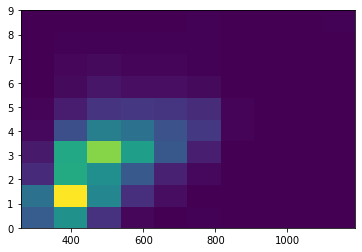

In [48]:
plt.hist2d(d['velo'],d['Kp'])

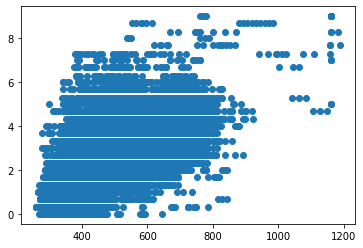

In [49]:
plt.plot(d['velo'],d['Kp'],'o')

In [50]:
from sklearn.neighbors import NearestNeighbors

In [51]:
def my_function(x):
    return list( dict.fromkeys(x) )

In [52]:
k=np.shape(d['velo'])
n1=np.size(d['velo'])
X = np.zeros((n1,2))
X1= np.zeros((n1,2))
X2= np.zeros((n1,2))

In [53]:
X[:,0]=d['velo']
X[:,1]=d['Kp']
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [54]:
indices

array([[    0,  2921, 14489, 11556, 13617],
       [ 9705, 12256,   942,   943,  5180],
       [ 2916,     2, 12925, 14791,  5486],
       ...,
       [ 6609,  5365, 16774,  6610,  7878],
       [ 3148, 15374,  5366, 16775, 11023],
       [16776, 15910,  5009,  3850,  7258]], dtype=int64)

In [55]:
distances

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.29999995],
       ...,
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [56]:
k=[]
for i in range (n1):
    if distances[i,1]<0.1 and distances[i,2]<0.1 and distances[i,3]<0.1 and distances[i,4]<0.1  :
        k=np.append(k,indices[i,0])
k=sorted(my_function(k))


for i in range (np.size(k)):
    k[i]=np.int(k[i])

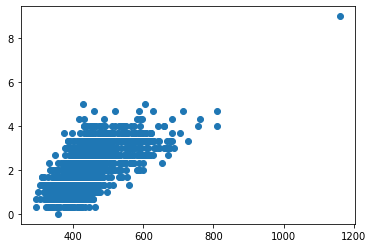

In [57]:
plt.plot(X[k,0],X[k,1],'o')

In [58]:
X1[:,0]=d['BzIMF']
X1[:,1]=d['Kp']
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(X1)
distances, indices = nbrs.kneighbors(X1)

In [59]:
indices

array([[ 7901,  3495,  8784, 10333,  8739],
       [14558,  2918,  1700, 11711,  9739],
       [    2, 13689,  6826,  8119,   721],
       ...,
       [  940,  8593,  1000,  9504, 15962],
       [ 4537,  9023, 16552, 16775,   410],
       [ 4963,  7930,  5798,  2525,  5500]], dtype=int64)

In [60]:
distances

array([[0.       , 0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.0999999, 0.0999999, 0.0999999],
       ...,
       [0.       , 0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       ]])

In [61]:
k1=[]
for i in range (n1):
    if distances[i,1]<0.1 and distances[i,2]<0.1 and distances[i,3]<0.1 and distances[i,4]<0.1  :
        k1=np.append(k1,indices[i,0])
k1=sorted(my_function(k1))
for i in range (np.size(k1)):
    k1[i]=np.int(k1[i])

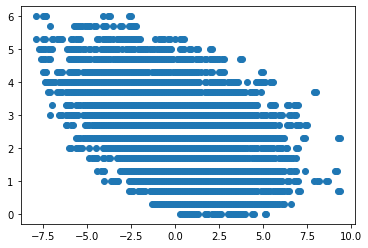

In [62]:
plt.plot(X1[k1,0],X1[k1,1],'o')

In [63]:
X2[:,0]=d['dens']
X2[:,1]=d['Kp']
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(X2)
distances, indices = nbrs.kneighbors(X2)

In [64]:
print(indices)

[[10734  8847 14627 14415 16492]
 [ 1273 16619  3723 16568 14101]
 [13405  5063  3225  9315 16614]
 ...
 [ 5587   926 10689  3103  5589]
 [11413  5379 13915  5588 16775]
 [13927 14143  5926  9692  9895]]


In [65]:
print(distances)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [66]:
k2=[]
for i in range (n1):
    if distances[i,1]<0.1 and distances[i,2]<0.1 and distances[i,3]<0.1 and distances[i,4]<0.1  :
        k2=np.append(k2,indices[i,0])
k2=sorted(my_function(k2))


for i in range (np.size(k2)):
    k2[i]=np.int(k2[i])

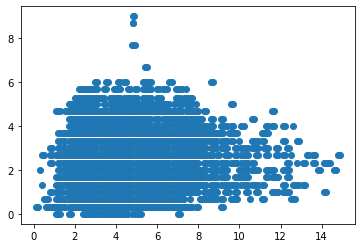

In [67]:
plt.plot(X2[k2,0],X2[k2,1],'o')

In [68]:
m=sorted(np.intersect1d(k1,k2,k))
print(m)

[192, 224, 402, 406, 567, 675, 747, 779, 967, 1067, 1094, 1117, 1180, 1302, 1304, 1477, 1610, 1613, 1881, 2087, 2179, 2286, 2356, 2427, 2472, 2540, 2565, 2667, 2704, 2806, 2877, 3019, 3044, 3306, 3566, 3597, 3655, 3772, 3829, 4272, 4282, 4605, 4657, 4719, 5029, 5153, 5415, 5444, 5524, 5712, 5868, 5877, 5910, 5914, 5920, 5964, 6105, 6257, 6487, 6603, 6705, 7066, 7343, 7491, 7663, 7682, 7693, 7763, 7787, 7830, 8578, 8756, 9220, 9232, 9342, 9425, 9580, 9618, 9711, 9748, 9774, 9808, 9842, 9903, 9957, 10117, 10130, 10267, 10271, 10309, 10371, 10416, 10456, 10493, 10647, 10768, 10825, 11004, 11019, 11282, 11287, 11400, 11499, 11550, 11572, 11613, 11644, 11657, 11683, 11684, 11751, 11870, 11887, 11894, 12121, 12173, 12403, 12413, 12419, 12453, 12572, 12574, 12757, 12789, 12793, 12796, 12806, 12840, 12948, 13242, 13272, 13283, 13292, 13366, 13423, 13428, 13444, 13470, 13532, 13699, 13794, 13871, 13902, 13951, 14031, 14129, 14242, 14317, 14338, 14784, 14791, 14824, 14940, 14982, 14995, 15031, 1

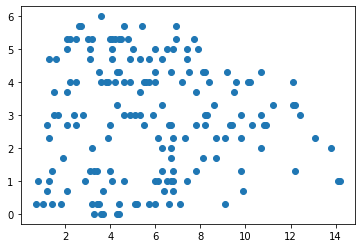

In [69]:
plt.plot(X2[m,0],X2[m,1],'o')

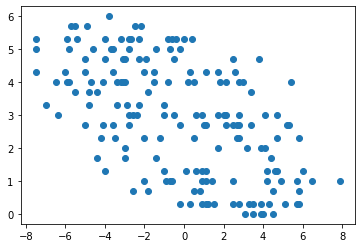

In [70]:
plt.plot(X1[m,0],X1[m,1],'o')

In [71]:
X[m,0]-d['velo'][m]

dmarray([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

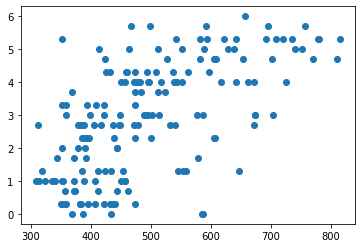

In [72]:
plt.plot(X[m,0],X[m,1],'o')

In [73]:
Kp=X[m,1]
Velo=X[m,0]
Bz=X1[m,0]
dens=X2[m,0]
print(Velo)

[369. 394. 411. 385. 352. 378. 352. 359. 448. 411. 374. 318. 371. 353.
 340. 358. 431. 433. 356. 350. 703. 384. 323. 447. 409. 344. 586. 450.
 493. 491. 422. 396. 388. 352. 531. 385. 390. 335. 423. 358. 352. 384.
 436. 422. 431. 443. 474. 621. 544. 379. 351. 356. 425. 413. 423. 405.
 495. 540. 308. 479. 368. 524. 458. 387. 457. 484. 444. 390. 691. 576.
 501. 406. 608. 673. 757. 454. 588. 579. 460. 416. 391. 395. 495. 606.
 539. 449. 511. 474. 472. 540. 422. 393. 434. 500. 653. 407. 456. 496.
 475. 672. 702. 512. 552. 438. 508. 527. 641. 616. 558. 545. 597. 646.
 592. 628. 398. 479. 605. 740. 720. 815. 734. 695. 481. 473. 463. 467.
 552. 553. 536. 605. 473. 461. 457. 499. 471. 489. 581. 542. 514. 313.
 778. 779. 672. 450. 724. 662. 440. 437. 562. 443. 473. 673. 352. 638.
 751. 708. 311. 371. 389. 382. 372. 381. 581. 594. 809. 770. 585. 586.
 516. 656. 642.]





### from sklearn import svm

In [74]:
from sklearn import svm
linear_svc = svm.SVC(kernel='linear')
rbf_svc = svm.SVC(kernel='rbf')
stgmoid_svc = svm.SVC(kernel='sigmoid')
polynomial_svc = svm.SVC(kernel='polynomial')

In [87]:
clf = svm.SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)

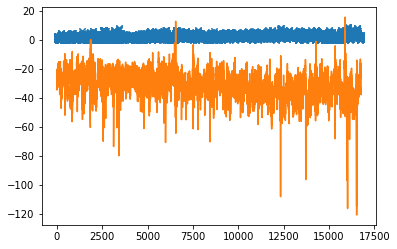

In [83]:
plt.plot(d['Kp'],'-x')
#formule=0.05+2.244*1e-4*d['velo']**(4/3)+2.844*1e-6*d['velo']*d['dens']**(1/2)
#plt.plot(formule)
G=(-40.47886218305926)+ v*( -7.71097871e-02)+ n*(-6.32145735e-01)+ bz*(1.54359680e+00)+ n2*(-3.05850934e-03)+lnv*(8.30402018e+00)+(3.43954532e-05)*v*n
+ (684761763e-04)*v*bz+v*lnv*(9.39851690e-03)+(1.35240937e-01)*n*lnv+(5.74309877e-05)*bz*n2-(-3.31486274e-01)*bz*lnv
plt.plot(G)

In [84]:
np.size(d['Kp'])

16777

In [85]:
error=npl.norm(y-G)/(np.sqrt(16777))
print(error)

35.09418818084185


In [88]:

import pymssql
import configparser



C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  """Entry point for launching an IPython kernel.


In [89]:
from prettytable import from_csv
from prettytable import PrettyTable

In [90]:
import csv

In [91]:
with open('mycsv.csv','w',newline='') as f:
    fieldnames=['Kp','Velo','Bz','dens']
    thewriter=csv.DictWriter(f,fieldnames=fieldnames)
    
    
    thewriter.writeheader()
    for i in range (np.size(Kp)):
        thewriter.writerow({'Kp':Kp[i],'Velo':Velo[i],'Bz':Bz[i],'dens':dens[i]})

In [92]:
import pandas as pd
import tkinter as tk
from tkinter import filedialog
from pandas import DataFrame

In [93]:
table={'Kp':Kp,'Velo':Velo,'Bz':Bz,'dens':dens}

In [94]:
df = DataFrame(table, columns= ['Kp','Velo','Bz','dens'])

In [95]:
df.to_csv('table1', encoding='utf-8', index=False)

In [96]:
def my_kernel(X, Y):
    return np.dot(X, Y.T)
clf = svm.SVC(kernel=my_kernel(Kp,Velo))
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel=266722.70091319084, max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [97]:
for i in range (np.size(dens)):
    if dens[i]==0:
        print("n")

Automatically created module for IPython interactive environment


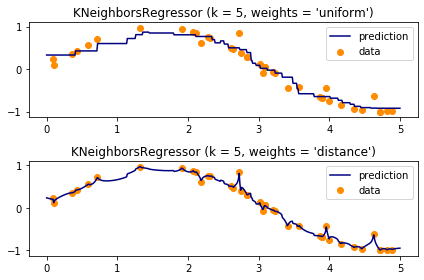

In [101]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#         Fabian Pedregosa <fabian.pedregosa@inria.fr>
#
# License: BSD 3 clause (C) INRIA


# #############################################################################
# Generate sample data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()